In [215]:

import pandas as pd

df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")
print(df.head())


   Accident_ID       Date    City Weather Vehicles_Involved Casualties  \
0        101.0  1/15/2023   Delhi   Clear             truck          1   
1        102.0  2/10/2023  Mumbai   Rainy               bus          3   
2        103.0   3/5/2023  Bhopal     Fog              bike          0   
3        104.0  3/25/2023  Indore   Clear             truck          0   
4        105.0  4/12/2023    Pune   Clear               car          2   

  Severity cause_of_accident  
0      Low      overspeeding  
1     High           alcohol  
2   Medium      overspeeding  
3      Low          whether   
4     High           alcohol  


In [232]:
df.describe()

,Accident_ID
count,8.00000
mean,104.50000
std,2.44949
min,101.00000
25%,102.75000
50%,104.50000
75%,106.25000
max,108.00000


# starter Code (01_data_cleaning.ipynb)

In [218]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.dropna(inplace=True)                  # Drop missing values (basic cleaning)

# Step 4: Feature Engineering
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()

print(df[['Date', 'Month', 'Day_of_Week']].head())


Dataset Shape: (12, 8)
   Accident_ID       Date    City Weather Vehicles_Involved Casualties  \
0        101.0  1/15/2023   Delhi   Clear             truck          1   
1        102.0  2/10/2023  Mumbai   Rainy               bus          3   
2        103.0   3/5/2023  Bhopal     Fog              bike          0   
3        104.0  3/25/2023  Indore   Clear             truck          0   
4        105.0  4/12/2023    Pune   Clear               car          2   

  Severity cause_of_accident  
0      Low      overspeeding  
1     High           alcohol  
2   Medium      overspeeding  
3      Low          whether   
4     High           alcohol  
        Date  Month Day_of_Week
0 2023-01-15      1      Sunday
1 2023-02-10      2      Friday
2 2023-03-05      3      Sunday
3 2023-03-25      3    Saturday
4 2023-04-12      4   Wednesday


# Starter Code for EDA (02_eda_visualization.ipynb)

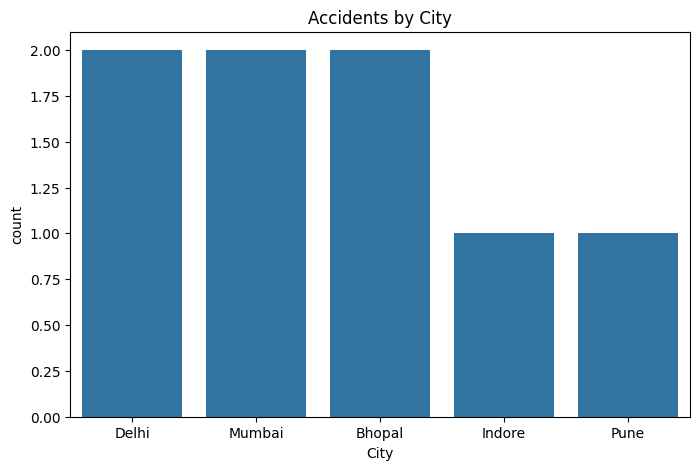

In [219]:
# City-wise accident count
plt.figure(figsize=(8,5))
sns.countplot(x="City", data=df)
plt.title("Accidents by City")
plt.show()

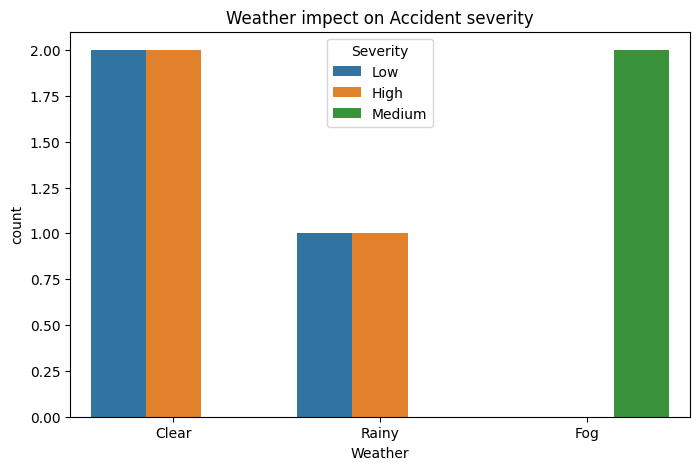

In [220]:
# whether vs severity
plt.figure(figsize=(8,5))
sns.countplot(x="Weather", hue="Severity", data=df)
plt.title("Weather impect on Accident severity")
plt.show()


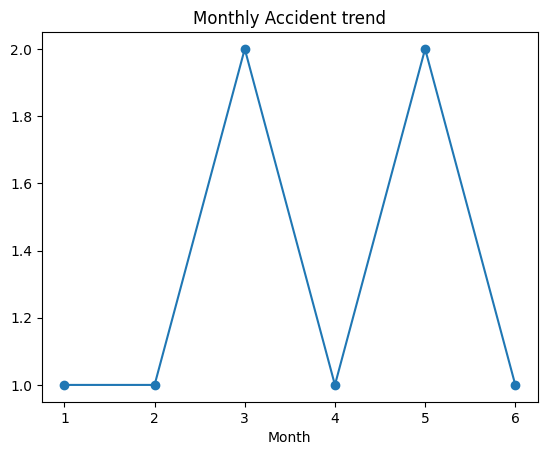

In [221]:
#Time trend
df.groupby("Month")["Accident_ID"].count().plot(kind="line", marker="o")
plt.title("Monthly Accident trend")
plt.show()

In [222]:
print(df.columns)


Index(['Accident_ID', 'Date', 'City', 'Weather', 'Vehicles_Involved',
       'Casualties', 'Severity', 'cause_of_accident', 'Month', 'Day_of_Week'],
      dtype='object')


# Starter Code for ML (03_ML_Model.ipynb)

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Data Load
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")

# 2. Target column (Severity)
y = df["Severity"]

# 3. Features (baaki sab, except Severity)
X = df.drop(["Severity", "Accident_ID", "Date"], axis=1)  
# Accident_ID aur Date analysis me useful nahi hote, isliye hata diye

# 4. Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 5. Encode target (Low=0, Medium=1, High=2)
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Features shape:", X_train.shape)
print("✅ Target shape:", y_train.shape)


✅ Features shape: (9, 15)
✅ Target shape: (9,)


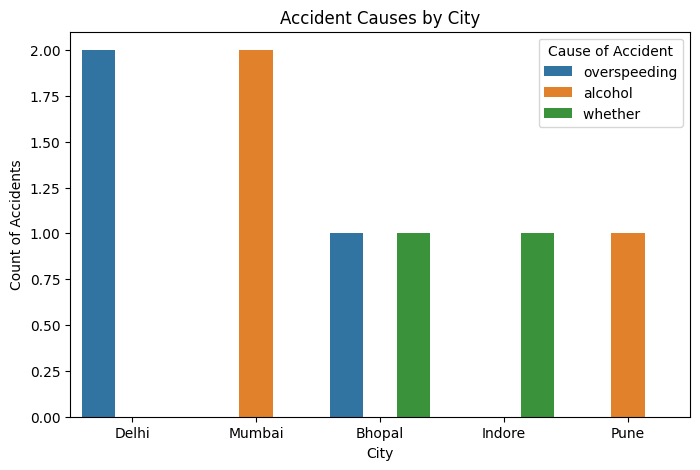

In [224]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="City", hue="cause_of_accident", data=df)

plt.title("Accident Causes by City")
plt.xlabel("City")
plt.ylabel("Count of Accidents")
plt.legend(title="Cause of Accident")
plt.show()


In [225]:
print (df.columns)

Index(['Accident_ID', 'Date', 'City', 'Weather', 'Vehicles_Involved',
       'Casualties', 'Severity', 'cause_of_accident'],
      dtype='object')


In [226]:
df["Vehicles_Involved"]


0     truck
1       bus
2      bike
3     truck
4       car
5     truck
6       car
7     truck
8       NaN
9       NaN
10      NaN
11      NaN
Name: Vehicles_Involved, dtype: object

#Bar chart

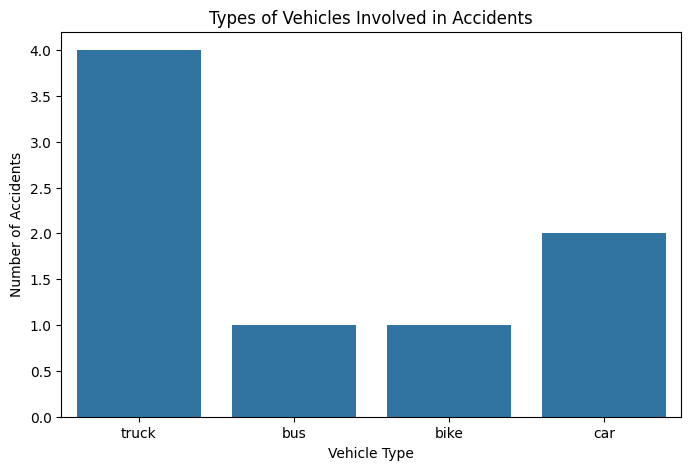

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="Vehicles_Involved", data=df)

plt.title("Types of Vehicles Involved in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.show()


# pie chart

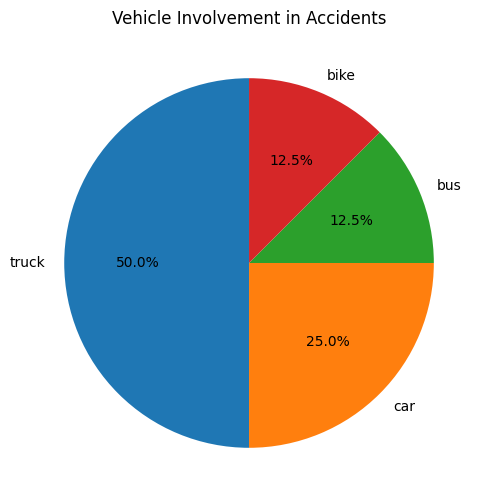

In [228]:
df["Vehicles_Involved"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    figsize=(6,6), 
    startangle=90
)
plt.title("Vehicle Involvement in Accidents")
plt.ylabel("")
plt.show()


# pie chart of cause of accident

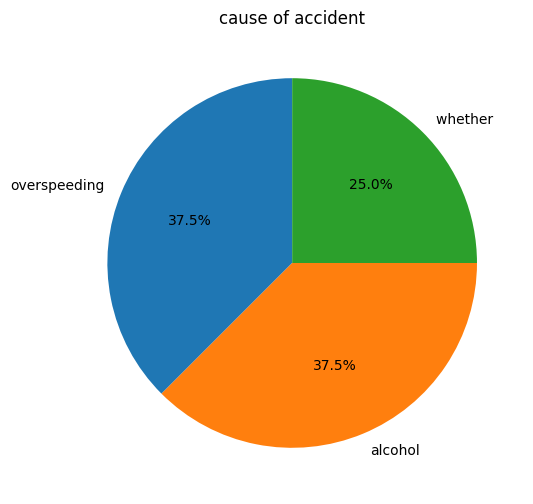

In [229]:
df["cause_of_accident"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    startangle=90
)
plt.title("cause of accident")
plt.ylabel("")
plt.show()